# Clojure, JavaCV and Jupyter notebooks

JavaCV has the advantage of being compiled with GPU support... 
In this first example we load a picture marcel.jpg and display it in a frame

In [1]:
(import '[org.bytedeco.javacv CanvasFrame OpenCVFrameConverter$ToMat]
        '[javax.swing WindowConstants]
        '[org.bytedeco.opencv.global opencv_imgcodecs])


#'hello/baby-steps

In [14]:
(let[ marcel (opencv_imgcodecs/imread "marcel.jpg")
      converter (OpenCVFrameConverter$ToMat.)
      ; canvas (CanvasFrame. "Marcel" 0 nil) ; fullscreen
      canvas (CanvasFrame. "Marcel")
      ]
(.showImage canvas (.convert converter marcel)))

In [10]:
(import '[org.bytedeco.javacv OpenCVFrameConverter$ToIplImage]
        '[org.bytedeco.opencv.opencv_core Size]
        '[org.bytedeco.javacv Java2DFrameConverter]
        '[org.bytedeco.opencv.global opencv_imgcodecs opencv_imgproc])

org.bytedeco.opencv.global.opencv_imgproc

In [11]:
(defn IplImageToBufferedImage [src] 
    (let[ grabberConverter (OpenCVFrameConverter$ToIplImage.)
          paintConverter (org.bytedeco.javacv.Java2DFrameConverter.)
          frame (.convert grabberConverter src)
          ]
    (.getBufferedImage paintConverter frame)))

#'smooth/IplImageToBufferedImage

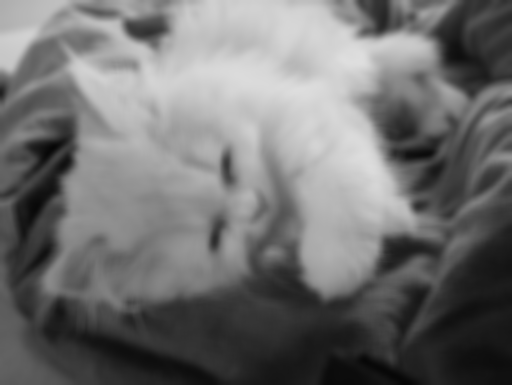

In [12]:
(let[marcel (opencv_imgcodecs/imread "marcel.jpg")]
    (opencv_imgproc/GaussianBlur marcel marcel (Size. 9 9) 20.0)
    (opencv_imgproc/cvtColor marcel marcel opencv_imgproc/COLOR_BGR2GRAY)
    (IplImageToBufferedImage marcel))